In [204]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data= pd.read_csv('Folds5x2_pp.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 9568


In [3]:
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

In [4]:
data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity', 'Output']
data.head()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.describe()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


C:\Users\NAFIS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


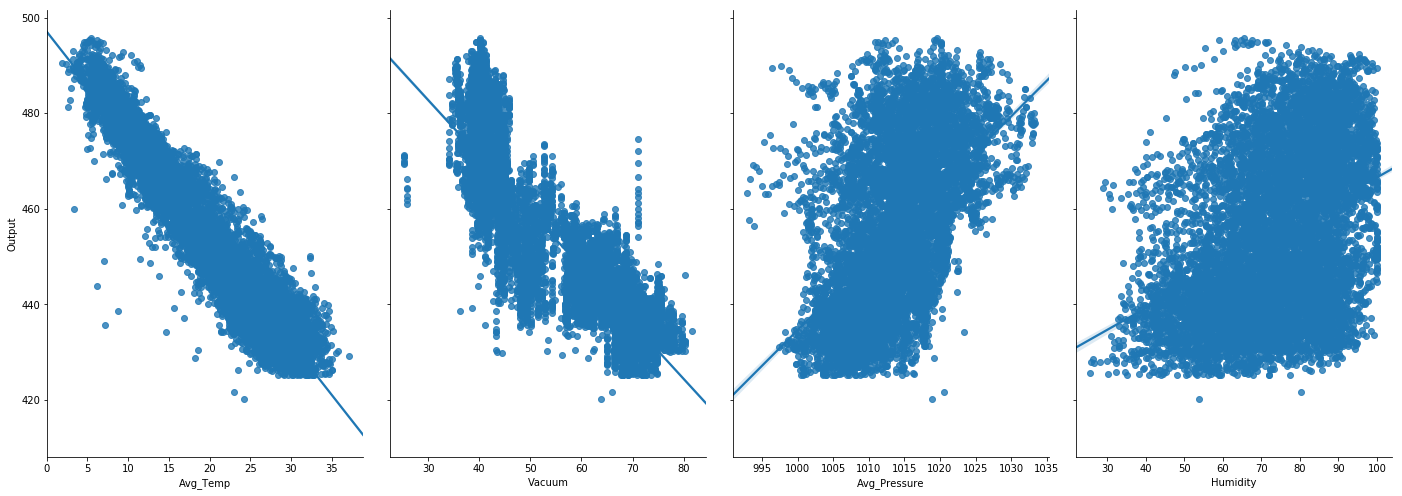

In [6]:
sb.pairplot(data, x_vars=['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity'], y_vars='Output',height=7, aspect=0.7, kind='reg')

 ## Prepare for One variable

In [7]:
print (data.corr()) 

              Avg_Temp    Vacuum  Avg_Pressure  Humidity    Output
Avg_Temp      1.000000  0.844107     -0.507549 -0.542535 -0.948128
Vacuum        0.844107  1.000000     -0.413502 -0.312187 -0.869780
Avg_Pressure -0.507549 -0.413502      1.000000  0.099574  0.518429
Humidity     -0.542535 -0.312187      0.099574  1.000000  0.389794
Output       -0.948128 -0.869780      0.518429  0.389794  1.000000


In [222]:
X = data['Avg_Temp'].values.reshape(-1,1)
y = data['Output'].values.reshape(-1,1)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [224]:
reg= LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [225]:
y_pred = reg.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.9049536175690113
Mean Absolute Error: 4.174438156494202
Mean Squared Error: 27.799910669569332
Root Mean Squared Error: 5.272562059337883


In [226]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:39:45   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

## Graph to show the True and Predicted Data

Text(0, 0.5, 'Predictions')

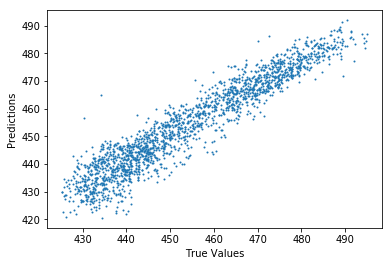

In [227]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Prepare for Multivariable

In [95]:
X = data[['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity']].values
y = data['Output'].values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
y_pred = reg.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.9255227831897781
Mean Absolute Error: 3.692096433830452
Mean Squared Error: 21.89913831564548
Root Mean Squared Error: 4.679651516474863


In [19]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:15:20   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

## Graph to show the True and Predicted Data 

Text(0, 0.5, 'Predictions')

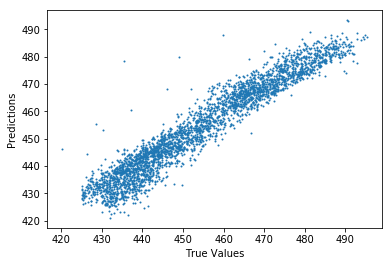

In [216]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Prepare for Random Forest

In [91]:
X = data[['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity']].values
y = data['Output'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
rndforest= RandomForestRegressor()
rndforest.fit(X_train, y_train)

C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [210]:
y_pred = rndforest.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.9857553504282497
Mean Absolute Error: 1.3026481655691446
Mean Squared Error: 4.188469502351831
Root Mean Squared Error: 2.0465750663857483


## Graph to show the True and Predicted Data

Text(0, 0.5, 'Predictions')

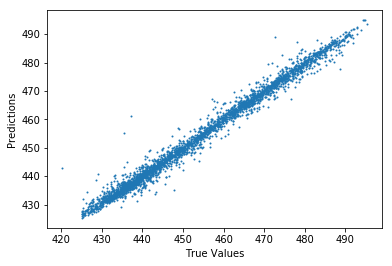

In [211]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Prepare for Support Vector Regression

In [87]:
X = data[['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity']].values
y = data['Output'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
svr= SVR()
svr.fit(X_train, y_train)

C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [212]:
y_pred = svr.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.4641977724449303
Mean Absolute Error: 9.804217686927862
Mean Squared Error: 157.54626171058806
Root Mean Squared Error: 12.551743373356071


## Graph to show the True and Predicted Data

Text(0, 0.5, 'Predictions')

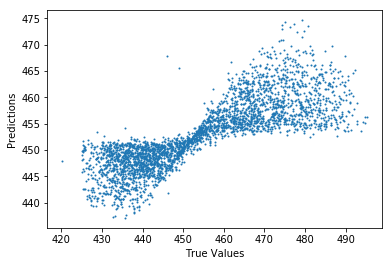

In [213]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Doing KFold for optimal results with K=5

In [198]:
X = data[['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity']].values
y = data['Output'].values

In [207]:
predictions1 = cross_val_predict(SVR(), X, y, cv=5)
accuracy1 = metrics.r2_score(y, predictions1)
print ("Cross-Predicted Accuracy for SVR:", accuracy1)
predictions2 = cross_val_predict(RandomForestRegressor(), X, y, cv=5)
accuracy2 = metrics.r2_score(y, predictions2)
print ("Cross-Predicted Accuracy for Random Forest :", accuracy2)
predictions3 = cross_val_predict(LinearRegression(), X, y, cv=5)
accuracy3 = metrics.r2_score(y, predictions3)
print ("Cross-Predicted Accuracy for Linear Regression :", accuracy3)

C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Cross-Predicted Accuracy for SVR: 0.4153313655064198


C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NAFIS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Cross-Predicted Accuracy for Random Forest : 0.9581134834394117
Cross-Predicted Accuracy for Linear Regression : 0.9286023992684798
